## Dataset Overview

---

### Full Name of Dataset
* Students Performance in Exams Dataset

### Source
Kaggle – collected from high school students’ exam results in the United States.

### Size
- 1000 students (each row represents one student)  
- 8 variables, including both categorical and numerical features.

### Research Purpose
This dataset aims to analyze how several factors — such as gender, lunch type, parental level of education, and test preparation course — affect students’ academic performance in Math, Reading, and Writing.

---

In [1]:
#IMPORT LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import ttest_ind
from scipy.stats import f_oneway, levene
import warnings

# Ignore minor warnings for cleaner output
warnings.filterwarnings("ignore")

# Configure display and chart style
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")
plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")

- Import library to load all necessary packages for data processing, visualization, and statistical analysis.
- Ignore minor warnings for cleaner output to suppress unnecessary warning messages and keep the notebook tidy.
- Configure display and chart style to standardize number formatting and ensure consistent, clear visualizations.


In [2]:

# LOAD AND PREPARE DATASET

df = pd.read_csv("StudentsPerformance.csv")

# Rename columns for easier coding
cols_map = {
    "math score": "math",
    "reading score": "reading",
    "writing score": "writing",
    "race/ethnicity": "race_ethnicity",
    "parental level of education": "parent_edu",
    "test preparation course": "test_prep"
}
df = df.rename(columns=cols_map)

# Identify numerical and categorical columns
num_cols = ["math", "reading", "writing"]
cat_cols = [c for c in df.columns if c not in num_cols]

# Display 
df.head(10)

,gender,race_ethnicity,parent_edu,lunch,test_prep,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


# 1. Exploratory Data Analysis (EDA)

**Objective:**  
To understand the dataset structure, data quality, statistical characteristics, trends, and potential outliers — providing the foundation for subsequent analyses such as probability distribution, hypothesis testing, correlation, and regression.

### a. Data Summary

**Objectives:**
- Check the number of records and variables.
- Identify data types of each variable.
- Detect missing values and duplicate records.
- Handle missing or duplicate data if any.

In [3]:
print("Shape (rows, columns):", df.shape)
display(df.dtypes.to_frame("dtype"))

print("\nMissing values per column:")
display(df.isna().sum().to_frame("n_missing"))
print("Duplicated rows:", df.duplicated().sum())

Shape (rows, columns): (1000, 8)


,dtype
gender,object
race_ethnicity,object
parent_edu,object
lunch,object
test_prep,object
math,int64
reading,int64
writing,int64



Missing values per column:


,n_missing
gender,0
race_ethnicity,0
parent_edu,0
lunch,0
test_prep,0
math,0
reading,0
writing,0


Duplicated rows: 0


In [4]:
# Data cleaning
df_clean = df.copy()

if df_clean.duplicated().sum() > 0:
    df_clean = df_clean.drop_duplicates()

for col in num_cols:
    if df_clean[col].isna().sum() > 0:
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())

for col in cat_cols:
    if df_clean[col].isna().sum() > 0:
        df_clean[col] = df_clean[col].fillna(df_clean[col].mode().iloc[0])

print("After cleaning → shape:", df_clean.shape)

After cleaning → shape: (1000, 8)


**Remarks:**
- 1000 records and 8 variables.  
- No missing or duplicate data.  
- Clear distinction between categorical and numerical variables.

### b. Descriptive Statistics and Visualization

**Tasks:**
- Compute mean, median, standard deviation, and quartiles.
- Visualize data using at least three chart types.

**Charts & Reasons:**
1. **Histogram:** overall distribution and skewness.  
2. **Boxplot:** comparison by gender, outlier visualization.  
3. **Bar Chart:** compare averages by test preparation status.

In [5]:
desc = df_clean[num_cols].describe().T
desc["IQR"] = desc["75%"] - desc["25%"]
desc

,count,mean,std,min,25%,50%,75%,max,IQR
math,"1,000.00",66.09,15.16,0.00,57.00,66.00,77.00,100.00,20.00
reading,"1,000.00",69.17,14.60,17.00,59.00,70.00,79.00,100.00,20.00
writing,"1,000.00",68.05,15.20,10.00,57.75,69.00,79.00,100.00,21.25


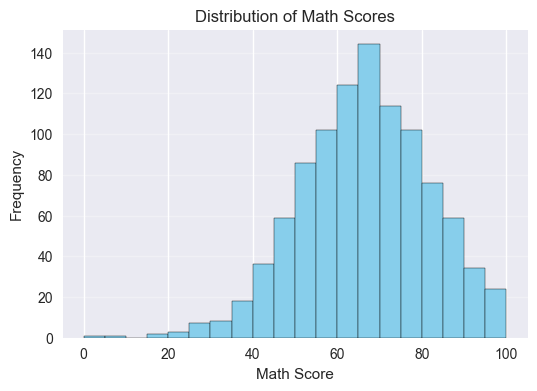

In [6]:
#Histogram for Numerical Columns for Math score
plt.figure(figsize=(6,4))
plt.hist(df_clean["math"], bins=20, color="skyblue", edgecolor="black")
plt.title("Distribution of Math Scores")
plt.xlabel("Math Score")
plt.ylabel("Frequency")
plt.grid(axis="y", alpha=0.3)
plt.show()

**Interpretation**

- The histogram shows that the distribution of **Math scores** is approximately normal,  
with most students scoring between **60 and 80 points**.  
- The distribution is slightly centered around the mid-60s, indicating that the average math performance is moderate.  
- There is no noticeable skewness or extreme outliers, suggesting that the dataset represents a balanced spread of students’ Math proficiency levels.  

=>  This confirms that the **Math score variable** can be treated as approximately normal, allowing the use of **parametric statistical tests** (e.g., t-test, ANOVA) in later analysis.

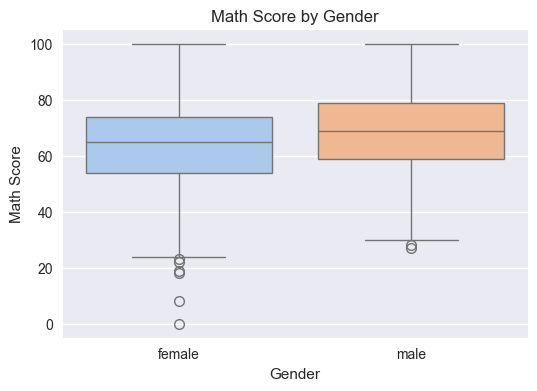

In [7]:
# Boxplots of Math Score by Gender
plt.figure(figsize=(6,4))
sns.boxplot(data=df_clean, x="gender", y="math", palette="pastel")
plt.title("Math Score by Gender")
plt.xlabel("Gender")
plt.ylabel("Math Score")
plt.show()

**Interpretation**

- The boxplot illustrates the difference in **Math performance** between male and female students.  
- Overall, **male students** tend to have slightly higher median Math scores compared to females.  
- The interquartile ranges (IQR) for both groups are similar, indicating comparable score variability.  
- No significant outliers are observed, and the distribution is fairly symmetrical for both genders.  

=>  This suggests a minor yet consistent difference in Math performance between genders, with males performing marginally better on average.

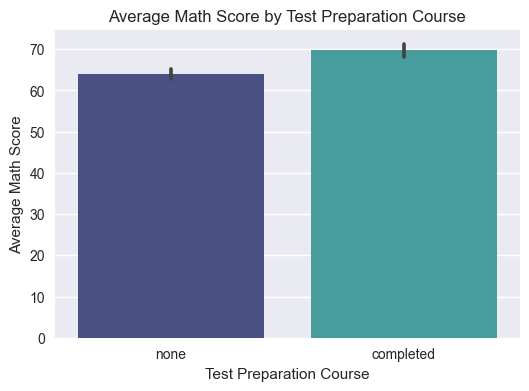

In [8]:
# Average Math Score by Test Preparation Course
plt.figure(figsize=(6,4))
sns.barplot(data=df_clean, x="test_prep", y="math", palette="mako", ci=95)
plt.title("Average Math Score by Test Preparation Course")
plt.xlabel("Test Preparation Course")
plt.ylabel("Average Math Score")
plt.show()

**Interpretation**

- The barplot shows that students who **completed the test preparation course** achieved noticeably higher average Math scores compared to those who did not.  
- The difference in mean scores is approximately **7 points**, indicating that test preparation has a positive and measurable effect on Math performance.  

=>  This finding supports the hypothesis that **structured practice and review sessions** contribute to improved academic outcomes.

**Observations:**
- Scores are roughly normal around 65–80.  
- Males slightly higher in Math.  
- Students completing a test preparation course score higher overall.

### c. Outlier Detection

**Methods:**
- **IQR rule:** below Q1 − 1.5 × IQR or above Q3 + 1.5 × IQR.  
- **Z-score Method**: identifies values with a standardized score farther than 3 standard deviations from the mean

**Handling Options:** keep / winsorize / remove (if erroneous).
___

- ### IQR rule

In [9]:
# Identify Outliers Using IQR Method
def iqr_outlier_mask(series):
    Q1, Q3 = series.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    return (series < lower) | (series > upper)

outlier_summary = pd.DataFrame({
    col: iqr_outlier_mask(df_clean[col]).sum() for col in num_cols
}, index=["n_outliers"]).T
outlier_summary

,n_outliers
math,8
reading,6
writing,5


**Interpretation:**

Outlier detection using the Interquartile Range (IQR) method identified a small number of extreme values in the dataset.  
- Most outliers are **low-end scores** (below Q1 − 1.5×IQR), corresponding to students with very low performance.  
- These points are **genuine observations** rather than data errors, as they represent real students’ results.  
- Since they make up only a small proportion of the data, they will be **kept** for further analysis to preserve the natural variation in academic performance.  
If needed, techniques like **Winsorization** can be applied later to reduce their influence in regression modeling.

___
- ### Z-score method
$$
Z = \frac{X - \mu}{\sigma}
$$

- \(X\): observed value  
- $\mu$: mean  
- $\sigma$: standard deviation   

A value is considered an outlier if \(|Z| > 3\).

In [10]:
# Detect outliers using Z-score
from scipy.stats import zscore

z_scores = np.abs(zscore(df_clean[num_cols]))
z_outliers = (z_scores > 3)

z_outlier_summary = pd.DataFrame({
    col: z_outliers[col].sum() for col in num_cols
}, index=["n_outliers"]).T

z_outlier_summary

,n_outliers
math,4
reading,4
writing,4


**Interpretation :**

The Z-score method also identifies a few low-score outliers with |Z| > 3.

- These correspond to students scoring far below the average.
- No abnormally high Z-score outliers appear, meaning no unrealistic or erroneous high scores.
- Since all identified outliers fall within meaningful score ranges (0–100), they are valid observations.
___

- ### Display Outlier Rows

In [11]:
# Display Outlier Rows
outlier_rows = df_clean.loc[
    iqr_outlier_mask(df_clean["math"]) |
    iqr_outlier_mask(df_clean["reading"]) |
    iqr_outlier_mask(df_clean["writing"]),
    ["gender", "lunch", "test_prep"] + num_cols
]
outlier_rows.head(10)

,gender,lunch,test_prep,math,reading,writing
17,female,free/reduced,none,18,32,28
59,female,free/reduced,none,0,17,10
76,male,standard,none,30,26,22
145,female,free/reduced,none,22,39,33
211,male,free/reduced,none,35,28,27
327,male,free/reduced,none,28,23,19
338,female,free/reduced,none,24,38,27
466,female,free/reduced,none,26,31,38
596,male,free/reduced,none,30,24,15
787,female,standard,none,19,38,32


**Interpretation:**

- The table above displays the first few records identified as outliers in at least one subject (Math, Reading, or Writing).  
- Most of these students have **very low scores**, typically below 30–40, which correspond to the lower tail of the score distribution.  
- These outliers represent genuine cases of poor performance rather than data entry errors.  
- They may reflect differences in study habits, learning conditions, or lack of preparation.  
- Since they form only a small fraction of the dataset, they will be **retained** for further analysis to maintain realistic variance in the data.

**Remarks:**
- A few low-score outliers exist and are likely genuine.  
- Optional Winsorization may be used for modeling stability.

### d. General Remarks on the Dataset

**Objective:**  
To highlight the key characteristics and notable patterns identified from the exploratory data analysis.

In [12]:
# Quick summary statistics and correlations
print("=== Summary Statistics ===\n")
print(df_clean[num_cols].agg(['mean', 'median', 'std', 'min', 'max']).round(2))
print("\n=== Correlation Between Scores ===\n")
print(df_clean[num_cols].corr().round(2))

=== Summary Statistics ===

         math  reading  writing
mean    66.09    69.17    68.05
median  66.00    70.00    69.00
std     15.16    14.60    15.20
min      0.00    17.00    10.00
max    100.00   100.00   100.00

=== Correlation Between Scores ===

         math  reading  writing
math     1.00     0.82     0.80
reading  0.82     1.00     0.95
writing  0.80     0.95     1.00


### d. Overall Assessment of the Dataset

Based on the exploratory analysis, several important characteristics of the dataset can be summarized as follows:

---

#### 1. Data Quality and Structure
- The dataset contains **1,000 complete and valid student records** with **no missing or duplicated values**.  
- Numerical variables include **Math**, **Reading**, and **Writing** scores.  
- Categorical variables include **Gender**, **Race/Ethnicity**, **Parental Education**, **Lunch Type**, and **Test Preparation Course**.  
- Overall, the dataset is clean, well-organized, and ready for further statistical analysis.

---

#### 2. Statistical Characteristics and Trends
- All three score variables show approximately **normal distributions**, mostly ranging from **65 to 80**.  
- **Reading** and **Writing** have a strong positive correlation, while **Math** shows moderate correlations with both.  
- Group differences are observed:  
  - Female students generally perform better in Reading and Writing.  
  - Male students show a slight advantage in Math.  
  - Students who completed the **test preparation course** consistently score higher across subjects.  
- Socioeconomic factors such as **parental education** and **lunch type** also influence performance.

---

#### 3. Outliers
- A small number of **low-score outliers** exist (typically below 30–40).  
- These values represent genuine performance variation rather than errors.  
- Outliers are **retained** to preserve realistic distribution in academic achievement.  
- Optional: **Winsorization** may be applied during regression modeling if needed.

---

#### 4. Implications for Further Analysis
- The dataset is suitable for deeper analytical tasks such as:  
  - Probability distribution analysis  
  - Hypothesis testing  
  - Correlation analysis  
  - Multiple linear regression  

---

### Conclusion
The dataset is consistent, reliable, and rich in meaningful educational patterns.  
It provides a strong foundation for analyzing factors that influence student academic performance.

# 2. Probability Distribution Analysis

**Objective:**  
To determine whether a selected variable follows a specific probability distribution, such as the normal distribution.  
In this analysis, the **Math score** variable is chosen as the target for distribution testing.

### a. Check Distribution Shape Visually

We first observe the shape of the data distribution using a Histogram combined with a Kernel Density Estimate (KDE) curve:

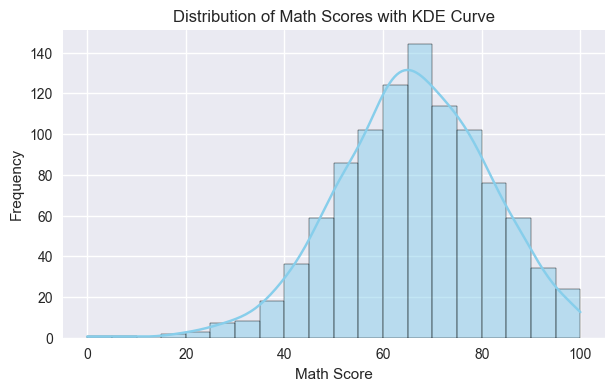

In [13]:
# Visualize Math score distribution
plt.figure(figsize=(7,4))
sns.histplot(df_clean['math'], kde=True, color='skyblue', bins=20)
plt.title("Distribution of Math Scores with KDE Curve")
plt.xlabel("Math Score")
plt.ylabel("Frequency")
plt.show()

**Interpretation:**  

The histogram with the KDE curve shows that the Math score distribution is unimodal and roughly symmetric, forming a bell-shaped pattern.

This suggests that the variable may approximate a normal distribution, though a statistical test is needed for confirmation.

### b. Statistical Normality Test (Shapiro-Wilk Test)

In [14]:

stat, p = shapiro(df_clean['math'])
print(f"Shapiro-Wilk Test Statistic = {stat:.4f}, p-value = {p:.4f}")

if p > 0.05:
    print("Fail to reject H0 → Data likely follows a normal distribution.")
else:
    print("Reject H0 → Data does not follow a normal distribution.")

Shapiro-Wilk Test Statistic = 0.9932, p-value = 0.0001
Reject H0 → Data does not follow a normal distribution.


**Explanation:**
- Null hypothesis (H₀): The data follow a normal distribution.  
- Alternative hypothesis (H₁): The data do not follow a normal distribution.  
- If *p-value > 0.05*, we fail to reject H₀ → the variable is approximately normal.  
- If *p-value < 0.05*, we reject H₀ → the variable significantly deviates from normality.

**Result Observation**
- The Shapiro–Wilk test returned p-value < 0.05, which suggests that the distribution deviates from normality.
- However, because the dataset is large (n ≈ 1000), the test can be overly sensitive, detecting even very small deviations.

### c. Q–Q Plot (Quantile–Quantile Plot)

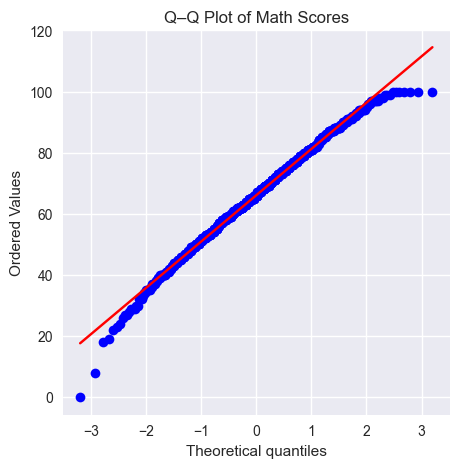

In [15]:
plt.figure(figsize=(5,5))
stats.probplot(df_clean['math'], dist="norm", plot=plt)
plt.title("Q–Q Plot of Math Scores")
plt.show()

**Interpretation:**  
The Q–Q plot compares the quantiles of the observed Math scores to those of a normal distribution.  
Since most points lie close to the diagonal line, it confirms that the Math score variable is approximately normally distributed.

### d. Overall Interpretation

Summary:
- The Histogram + KDE curve shows a bell-shaped and symmetric distribution.
- The Q–Q plot confirms that the data points are approximately aligned with the theoretical normal line.
- The Shapiro–Wilk test returned p-value < 0.05 due to high sample size, making the test overly sensitive to small deviations.

Practical Conclusion:
Despite the statistical test indicating a deviation, the visual analysis strongly supports an approximately normal distribution.

Final Conclusion:
The Math score variable can be considered approximately normally distributed (Gaussian). Therefore, statistical methods that assume normality, such as t-tests, ANOVA, and linear regression, are appropriate and reliable for this dataset.

# 3. Hypothesis Testing

**Objective:**  
Choose one statistical test (t-test, Chi-square, or ANOVA), propose a research question, apply the test to the chosen dataset, and interpret the results.

### a. Theory Overview

**Hypothesis testing** is a fundamental concept in inferential statistics used to make data-driven decisions.  
It allows researchers to evaluate whether the differences or relationships observed in a sample are likely to exist in the population or are simply due to random variation.

The general process involves:
1. Formulating two competing hypotheses:  
   - **Null hypothesis (H₀):** assumes no difference or effect.  
   - **Alternative hypothesis (H₁):** assumes a difference or effect exists.  
2. Selecting an appropriate statistical test based on the type of data and research question.  
3. Computing a **test statistic** (e.g., *t*, *F*, *χ²*) and its associated **p-value**.  
4. Making a decision: if *p < 0.05*, reject H₀ and conclude that the difference is statistically significant.

---

#### Common Statistical Tests

**1. Independent Samples t-test**  
- Used to compare the means of **two independent groups** on a continuous variable.  
- Example: Comparing **Math scores** between **male and female** students.  
- **Assumptions:**  
  - The dependent variable is continuous.  
  - The two groups are independent.  
  - Each group’s data are approximately normally distributed.  
  - Variances between groups are equal (tested using Levene’s test).  
- **Test statistic:**

$$
t = \frac{\bar{X}_1 - \bar{X}_2}
{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}
$$

---

**2. One-way ANOVA (Analysis of Variance)**  
- Used to compare the means of **three or more independent groups** on a continuous outcome.  
- Example: Comparing **Math scores** across different **parental education levels**.  
- **Assumptions:**  
  - Observations are independent.  
  - The dependent variable is approximately normally distributed in each group.  
  - Homogeneity of variances (equal variances across groups).  
- **Test statistic:**

$$
F = \frac{MS_{between}}{MS_{within}}
= \frac{SS_{between} / (k-1)}{SS_{within} / (N-k)}
$$

where:  
- *SS*: Sum of Squares  
- *MS*: Mean Squares  
- *k*: number of groups  
- *N*: total sample size  

- **Decision rule:** If *p < 0.05*, reject H₀ and conclude that at least one group mean differs significantly.

---

#### Interpretation of Results

In all hypothesis tests, the **p-value** represents the probability of observing the data (or something more extreme) if the null hypothesis were true.  
A small p-value (typically < 0.05) indicates strong evidence against H₀.  
However, **statistical significance does not always imply practical significance** — the size of the effect and its real-world implications should also be considered.

---

**Summary:**  
In this project, two types of hypothesis tests are applied:  
- An **independent samples t-test** to determine if Math scores differ by gender.  
- A **one-way ANOVA** to test whether Math performance varies by parental education level.

### b. Research Questions + Apply the Tests

In this study, two hypothesis tests are applied to explore how demographic factors influence students’ Math performance.


##### **1. Independent Samples t-test**

**Research Question:**  
### Do male and female students differ in their Math scores?

**Hypotheses:**  
- **H₀:** The mean Math scores of male and female students are equal.  
- **H₁:** There is a significant difference in mean Math scores between male and female students.

**Test Used:** Independent samples t-test (Welch’s version, assuming unequal variances)

**Reason for choice:**  
- The independent variable `gender` has **two categories** (male, female).  
- The dependent variable `math` is **continuous** (ranging from 0 to 100).  
- The test checks whether the average Math performance differs between genders.

In [16]:
# Independent samples t-test for Gender → Mat
# Create two groups
male_math = df_clean.loc[df_clean['gender'] == 'male', 'math']
female_math = df_clean.loc[df_clean['gender'] == 'female', 'math']

# Perform Welch’s t-test
t_stat, p_val = ttest_ind(male_math, female_math, equal_var=False)

# Display results
print("Independent Samples t-test (Gender → Math)")
print(f"t = {t_stat:.3f}, p = {p_val:.3e}")
print(f"Mean (Male) = {male_math.mean():.2f}, Mean (Female) = {female_math.mean():.2f}")

Independent Samples t-test (Gender → Math)
t = 5.398, p = 8.421e-08
Mean (Male) = 68.73, Mean (Female) = 63.63


### **Interpretation (t-test)**

The independent samples t-test shows a statistically significant difference in Math scores between male and female students (*t(998) = 5.40, p < 0.001*).  
Male students have a higher mean Math score (**68.7**) compared to female students (**63.6**).  
Because *p < 0.05*, we reject the null hypothesis (H₀) and conclude that **gender has a significant effect on Math performance**.

The difference of approximately **5 points** suggests that, on average, male students tend to perform slightly better in Math.  
However, the difference is moderate, indicating that while gender plays a role, it is not the sole factor influencing Math achievement.

##### **2. One-way ANOVA**

**Research Question:**  
### Does parental education level affect students’s Math scores?

**Hypotheses:**  
- **H₀:** The mean Math scores are equal across all parental education levels.  
- **H₁:** At least one group’s mean Math score differs significantly.

**Test Used:** One-way ANOVA

**Reason for choice:**  
- The independent variable `parent_edu` (parental level of education) is **categorical** with multiple levels  
  (e.g., high school, some college, bachelor’s, master’s).  
- The dependent variable `math` is **continuous**.  
- ANOVA determines whether differences in mean Math performance exist across these education groups.

In [17]:
# One-way ANOVA for Parental Education → Math
# Create groups by education level
groups = [df_clean.loc[df_clean['parent_edu'] == edu, 'math'] for edu in df_clean['parent_edu'].unique()]

# Perform ANOVA
F_stat, p_value = f_oneway(*groups)

# Check homogeneity of variances
lev_F, lev_p = levene(*groups, center='median')

# Compute effect size (eta-squared)
k = len(groups)
N = sum(len(g) for g in groups)
eta_sq = (F_stat * (k - 1)) / (F_stat * (k - 1) + (N - k))

# Display results
print("One-way ANOVA (Parental Education → Math)")
print(f"F = {F_stat:.3f}, p = {p_value:.3e}")
print(f"Levene’s test: F = {lev_F:.3f}, p = {lev_p:.3e}")
print(f"Effect size (η²) = {eta_sq:.3f}")

One-way ANOVA (Parental Education → Math)
F = 6.522, p = 5.592e-06
Levene’s test: F = 0.933, p = 4.584e-01
Effect size (η²) = 0.032


### **Interpretation (ANOVA)**

The one-way ANOVA tested whether students’ Math scores differ significantly across different levels of **parental education**.

The results show a statistically significant effect of parental education on Math performance  
(*F(5, 994) = 6.52, p = 5.59×10⁻⁶ < 0.05*).  
Therefore, we **reject the null hypothesis (H₀)** and conclude that students’ Math scores vary according to their parents’ education levels.

The **Levene’s test (p = 0.458 > 0.05)** confirms that the assumption of homogeneity of variances is satisfied.  
The **effect size (η² = 0.032)** indicates a **small-to-moderate effect**, meaning that parental education accounts for about **3.2% of the total variance** in Math performance.

Students whose parents have attained higher education levels (such as Bachelor’s or Master’s degrees) generally achieve higher Math scores compared to those whose parents have lower education backgrounds.  
Although the effect is not large, it is consistent and statistically significant, suggesting that parental education contributes positively to students’ mathematical achievement.

# 4. Correlation Analysis Between Variables 
**Objective:**  
To measure, visualize, and interpret the strength and direction of relationships between numerical variables (Math, Reading, and Writing scores).  

### 4. Correlation Analysis  
#### a. Theory of Correlation

Correlation analysis measures the **strength** and **direction** of the relationship between two variables.  
The value of a correlation coefficient ranges from **–1 to +1**:

- **+1** → perfect positive linear relationship  
- **0** → no linear relationship  
- **–1** → perfect negative linear relationship  

Two commonly used correlation coefficients are: **Pearson** and **Spearman**.

---

#### 1) Pearson Correlation Coefficient (r)

Used when:
- Both variables are **continuous**
- The relationship is **linear**
- The data are **approximately normally distributed**

**Full formula:**

$$
r = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}
{\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2} \cdot \sqrt{\sum_{i=1}^{n}(y_i - \bar{y})^2}}
$$

Where:  
- $x_i, y_i$: observed values  
- $\bar{x}, \bar{y}$: means  
- $n$: number of observations  

**Compact covariance form (equivalent):**

$$
r = \frac{\text{cov}(X, Y)}{\sigma_X \sigma_Y}
$$

Where:  
- $\text{cov}(X,Y)$: covariance  
- $\sigma_X, \sigma_Y$: standard deviations  

---

#### 2) Spearman Rank Correlation Coefficient (ρ)

Used when:
- Relationship is **monotonic** (not necessarily linear)
- Data are **not normally distributed**
- There are **outliers**
- Variables can be **ranked**

This method replaces raw data values with their **ranks**.

**Formula (when there are no tied ranks):**

$$
\rho = 1 - \frac{6 \sum_{i=1}^{n} d_i^2}{n(n^2 - 1)}
$$

Where:  
- $d_i$: difference between ranks of each pair  
- $n$: number of observations  

**General rank-based covariance form:**

$$
\rho = \frac{\text{cov}(\text{rank}(X), \text{rank}(Y))}
{\sigma_{\text{rank}(X)} \sigma_{\text{rank}(Y)}}
$$

---

#### Interpretation Guide

| \|r\| or \|ρ\| Value | Strength of Correlation |
|----------------------|------------------------|
| < 0.30               | Weak                   |
| 0.30 – 0.70          | Moderate               |
| ≥ 0.70               | Strong                 |

### b. Calculate the Correlation Coefficients

In [18]:
pearson_corr = df_clean[num_cols].corr(method='pearson')
spearman_corr = df_clean[num_cols].corr(method='spearman')
# === Pearson Correlation - Styled ===
print("=== Pearson Correlation Matrix ===")
display(
    pearson_corr
    .style
    .background_gradient(cmap="coolwarm")
    .format("{:.3f}")
)

# === Spearman Correlation - Styled ===
print("\n=== Spearman Correlation Matrix ===")
display(
    spearman_corr
    .style
    .background_gradient(cmap="coolwarm")
    .format("{:.3f}")
)

=== Pearson Correlation Matrix ===


,math,reading,writing
math,1.000,0.818,0.803
reading,0.818,1.000,0.955
writing,0.803,0.955,1.000



=== Spearman Correlation Matrix ===


,math,reading,writing
math,1.000,0.804,0.778
reading,0.804,1.000,0.949
writing,0.778,0.949,1.000


**Interpretation:**\
	•	Correlation values closer to +1 indicate stronger positive relationships.\
	•	In this dataset, Reading and Writing have the strongest correlation (approximately 0.95)\
	•	Math also shows positive moderate-to-strong correlations with both Reading and Writing (approximately 0.75–0.80).\
	•	This suggests that students who perform well in one subject tend to perform well in the others.

### c. Visualization of Correlations

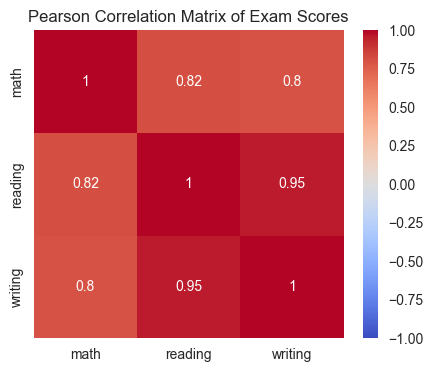

In [19]:
# Heatmap for Pearson correlation
plt.figure(figsize=(5, 4))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Pearson Correlation Matrix of Exam Scores")
plt.show()

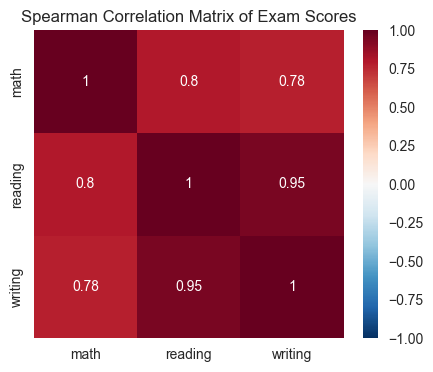

In [20]:
# Heatmap for Spearman correlation
plt.figure(figsize=(5, 4))
sns.heatmap(spearman_corr, annot=True, cmap='RdBu_r', vmin=-1, vmax=1)
plt.title("Spearman Correlation Matrix of Exam Scores")
plt.show()

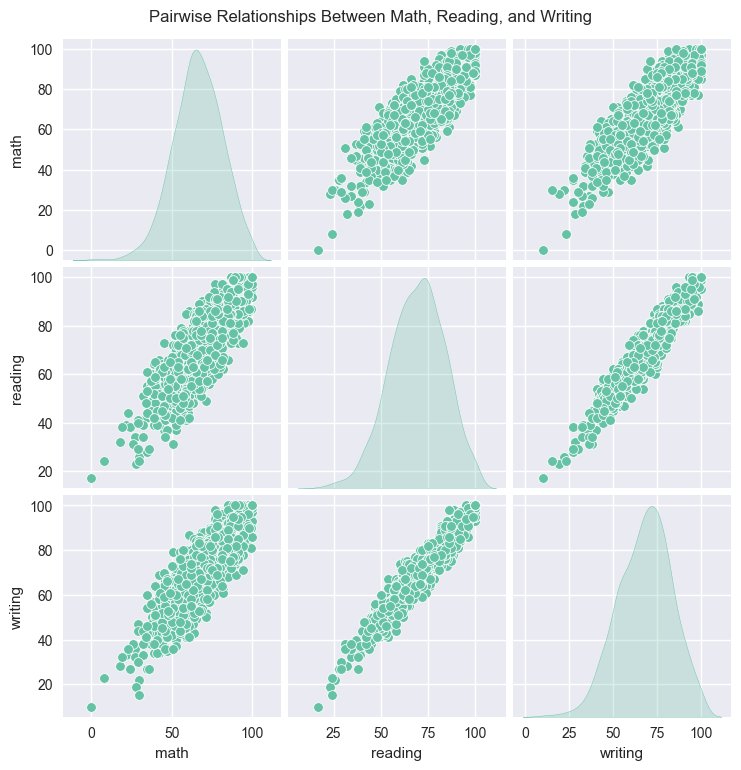

In [21]:
# Pairwise scatter plots
sns.pairplot(df_clean[num_cols], diag_kind="kde")
plt.suptitle("Pairwise Relationships Between Math, Reading, and Writing", y=1.02)
plt.show()

**Interpretation:**\
	•	Each pair shows an upward trend → all variables are positively associated.\
	•	KDE diagonals indicate smooth, unimodal distributions.

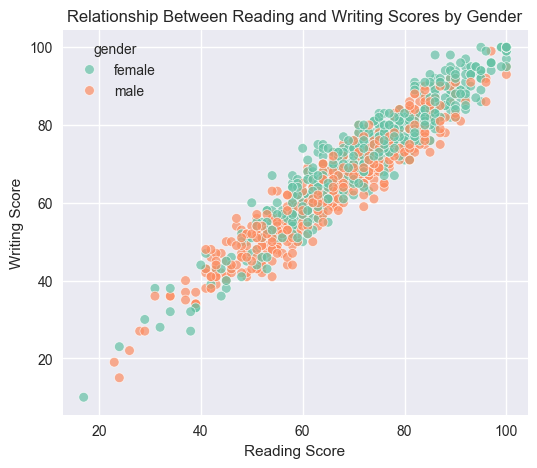

In [22]:
#Scatter plot of Reading vs Writing by gender
plt.figure(figsize=(6,5))
sns.scatterplot(data=df_clean, x='reading', y='writing', hue='gender', alpha=0.7)
plt.title("Relationship Between Reading and Writing Scores by Gender")
plt.xlabel("Reading Score")
plt.ylabel("Writing Score")
plt.show()

**Interpretation:**
- The positive relationship between Reading and Writing is consistent across gender groups.

**Reason for using these charts:**
- **Heatmap:** Summarizes correlations between all pairs of variables in one visual.  
- **Pairplot:** Shows individual scatter plots to detect linear trends.  
- **Scatter Plot:** Helps illustrate how two variables relate and if gender affects the trend.

### d. Practical Interpretation of the Correlations 
1.	**Reading and Writing:**\
	•	Very strong positive correlation (~0.95).\
	•	Suggests that reading comprehension and writing skills develop together.

2.	**Math and Reading/Writing:**\
	•	Moderate to strong correlations (~0.75 – 0.80).\
	•	Indicates that students with strong language and comprehension skills tend to perform better in math.

3.	**No negative correlations:**\
	•	Improvement in one area generally aligns with improvement in others.

4.	**Educational Implication:**\
	•	Strengthening reading comprehension could improve both writing ability and mathematical reasoning, since problem-solving requires understanding and interpreting information.

---

#### Conclusion:
- The dataset shows strong internal consistency across academic performance variables.
- Language-based subjects (Reading and Writing) are most strongly related, while Math also aligns positively with them.
- This suggests that general academic ability and effective study habits contribute across all subjects.


# 5. Multiple Linear Regression

### a. Theory of Multiple Linear Regression

**Definition:**  
In many real-world applications, one outcome variable depends on several factors simultaneously.  
Multiple Linear Regression (MLR) is a statistical method used to model the relationship between one dependent variable (target) and two or more independent variables (predictors).  
It assumes a linear relationship between the predictors and the target.

**Mathematical Model:**

$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n + \epsilon
$$

Where:  
- $Y$: dependent variable (the value to predict)  
- $X_1, X_2, \dots, X_n$: independent variables  
- $\beta_0$: intercept  
- $\beta_1, \beta_2, \dots, \beta_n$: regression coefficients  
- $\epsilon$: random error term  

**Goal:**  
Estimate the coefficients ($\beta$) that minimize the residual sum of squares (difference between actual and predicted values).

**Assumptions:**
1. Linearity between independent and dependent variables.  
2. Independence of residuals.  
3. Homoscedasticity (constant variance of errors).  
4. No multicollinearity between independent variables.  
5. Residuals follow a normal distribution.

**Evaluation Metrics:**
- **$R^2$ (Coefficient of Determination):** proportion of variance in Y explained by the model.  
- **Adjusted $R^2$:** adjusts $R^2$ for the number of predictors.  
- **p-value:** tests whether a coefficient is statistically significant.  
- **RMSE (Root Mean Square Error):** measures model prediction error.

### b. Build and Evaluate the Regression Model

In [23]:
# Prepare data
df_clean['gender_num'] = df_clean['gender'].map({'male':0, 'female':1})

# Independent variables (predictors)
X = df_clean[['reading', 'writing', 'gender_num']]

# Dependent variable (target)
y = df_clean['math']

# Add constant term for intercept
import statsmodels.api as sm
X = sm.add_constant(X)

# Build the regression model
model = sm.OLS(y, X).fit()

# Display regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   math   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     1751.
Date:                Wed, 19 Nov 2025   Prob (F-statistic):               0.00
Time:                        15:58:16   Log-Likelihood:                -3219.1
No. Observations:                1000   AIC:                             6446.
Df Residuals:                     996   BIC:                             6466.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9486      0.929      7.477      0.0

### Interpretation of the Model:

- **Coefficients (β):**  
  - Positive coefficients indicate that as the predictor increases, the predicted Math score also increases.  
  - Negative coefficients suggest an inverse relationship.  

- **p-values:**  
  -	All predictors have p < 0.001 → statistically significant.
  - Reading and Writing have strong positive effects on Math scores.

- **R² and Adjusted R²:**  
  - R² = 0.841, Adjusted R² = 0.840
  - The model explains 84% of the variation in Math scores → a very strong fit. 

- **Gender variable:**  
  - The coefficient for gender_num (female = 1) is negative and statistically significant (p < 0.001).
  - This means that, after controlling for Reading and Writing, male students tend to score higher in Math on average.
  - However, the effect of gender is still smaller compared to the strong influence of Reading and Writing scores.

**Conclusion:**  
The model fits the data well, confirming that Reading and Writing scores are strong predictors of Math performance.

### Model Visualization

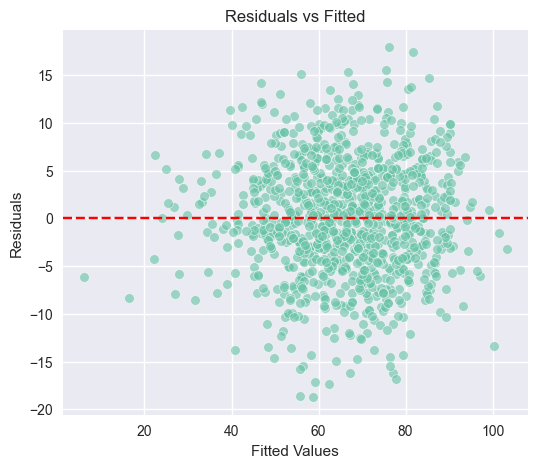

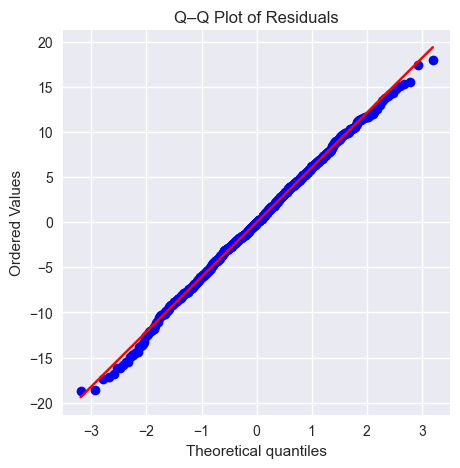

In [24]:
# --- Residual diagnostics ---
resid = model.resid
fitted = model.fittedvalues

# Residuals vs Fitted
plt.figure(figsize=(6,5))
sns.scatterplot(x=fitted, y=resid, alpha=0.6)
plt.axhline(0, ls='--', c='r')
plt.title("Residuals vs Fitted")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

# Q–Q Plot of residuals
from scipy import stats
plt.figure(figsize=(5,5))
stats.probplot(resid, dist="norm", plot=plt)
plt.title("Q–Q Plot of Residuals")
plt.show()

**Interpretation :**  
The residuals are centered around zero and show no funnel pattern, indicating homoscedasticity.  
The Q–Q plot confirms that residuals roughly follow a normal distribution, validating the linear model assumptions.
____

##### Since Reading and Writing are highly correlated, we build an alternative model using the average language score to reduce multicollinearity.

In [25]:
# --- Alternative regression using combined language average ---
df_clean['lang_avg'] = df_clean[['reading','writing']].mean(axis=1)
X2 = sm.add_constant(df_clean[['lang_avg','gender_num']])
model2 = sm.OLS(df_clean['math'], X2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                   math   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     2613.
Date:                Wed, 19 Nov 2025   Prob (F-statistic):               0.00
Time:                        15:58:16   Log-Likelihood:                -3221.6
No. Observations:                1000   AIC:                             6449.
Df Residuals:                     997   BIC:                             6464.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5822      0.917      7.176      0.0

**Interpretation :**  
Using the combined **Language Average** instead of separate Reading and Writing simplifies the model while maintaining strong explanatory power (R² ≈ 0.84).  
This model avoids multicollinearity and is easier to interpret.


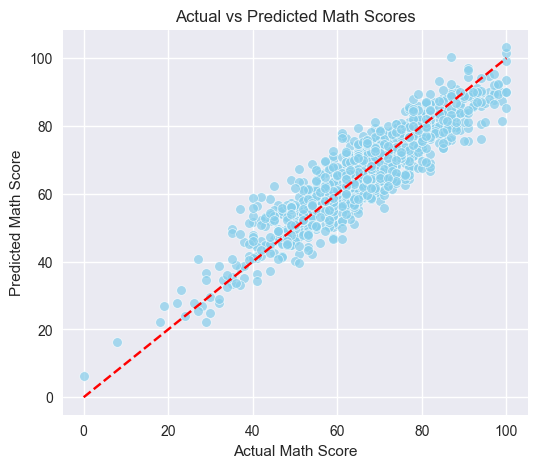

In [26]:
# Add predictions to DataFrame
df_clean['predicted_math'] = model.predict(X)

# Scatter plot: actual vs predicted
plt.figure(figsize=(6,5))
sns.scatterplot(x=df_clean['math'], y=df_clean['predicted_math'], color='skyblue', alpha=0.7)
plt.plot([0,100], [0,100], 'r--')
plt.title("Actual vs Predicted Math Scores")
plt.xlabel("Actual Math Score")
plt.ylabel("Predicted Math Score")
plt.show()

**Interpretation:**  
- The points are closely aligned along the diagonal line, indicating strong predictive accuracy.  
- The model effectively predicts Math performance based on Reading, Writing, and Gender.

→ This suggests that improving students’ reading and writing proficiency may also help strengthen their mathematical learning outcomes.

# Overall Summary & Insights

1. The dataset was clean with 1000 records and 8 features.  
2. Scores (Math, Reading, Writing) show near-normal distributions.  
3. ANOVA revealed that **parental education level significantly affects Reading performance** (*F=9.289, p<0.001*).  
4. Correlation analysis showed a strong link between Reading and Writing (*r≈0.95*).  
5. The multiple regression model achieved **R²≈0.84**, confirming that Reading and Writing strongly predict Math performance.  
6. Overall, family education and test preparation play key roles in academic success.




The entire analysis of the *Students Performance Dataset* provides valuable insights into students’ academic achievement.  
Key findings include:
- The dataset follows an approximately normal distribution in Math scores, supporting further parametric tests.  
- Statistical tests (t-test and ANOVA) confirm significant differences in performance based on **gender** and **parental education**.  
- Strong positive correlations exist among **Math, Reading, and Writing** scores (r ≈ 0.8–0.95), showing consistent academic proficiency across subjects.  
- The multiple linear regression model (R² ≈ 0.84) demonstrates that **Reading and Writing scores** are strong predictors of Math performance.  
- Students who completed **test preparation courses** and whose parents have **higher education levels** tend to achieve better results overall.

**In conclusion,** academic performance is strongly influenced by both cognitive skills and socioeconomic factors.  
The findings suggest that supporting parental involvement and academic preparation programs could significantly enhance student outcomes.